fruits dataset을

'mass', 'width', 'height', 'color_score' 네가지 feature를 모두 사용하는

K-NN classifier를 정의하고, 아래를 작성하여 pdf로 올려주세요.

1. 어떤 K에서 가장 좋은 성능을 보이는지 그래프를 통해 구하세요.

2. 그리고 그 때, [무게가 120, 너비가 6, 높이가 8, color_score가 0.7]인 과일은 무엇인지 만든 모델을 가지고 추정하세요.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
fruits = pd.read_table('../fruit_data_with_colors.txt')

In [17]:
x = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [8]:
k_range = range(1, 45)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

<IPython.core.display.Javascript object>


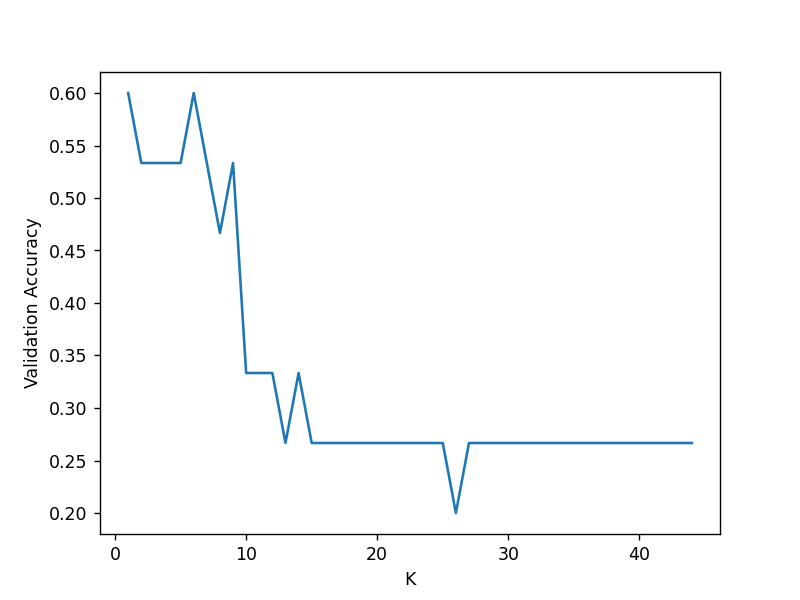

In [10]:
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.show()

-> K를 1부터 44까지 변경해서 실행시킨 결과, K=1에서 가장 좋은 성능을 보인다.

K=1에서 가장 좋은 성능을 보이기 때문에 해당 모델로 재설정 후 예측값 추정

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [4]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [16]:
fruit_prediction = knn.predict([[120, 6, 8, 0.7]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'